# Inferencia

Neste notebook, iremos realizar a parte de inferência, verificando os nosso coeficientes e validando nossos coeficientes.

A sequência de passos será definida da seguinte maneira:


1. Estimar o hiperplano

2. Realizar o teste de hipóteses com alpha = 1%

3. Caso, necessária, reestimar o hiperplano

4. Veririficar as métricas, comparando o R2 Ajustado dos modelos, Verificar multicolinearidade

5. Verificar modelo final, e fazer inferência a seu respeito

6. Verificar as suposições do modelo.

7. Conclusão


# Estimando o hiperplano

In [1]:
# IMPORTAR BIBLIOTECAS
# Libs essenciais
import pandas as pd
import numpy as np

# Import do Scipy para realizar a regrssão
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lendo nosso conjunto de dados, previamente pré-processado
df = pd.read_csv('inference.csv')

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
# Normalização de X. Iremos usar o StandartScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

colunas = X.columns

scaler = StandardScaler()
X[colunas] = scaler.fit_transform(X[colunas])
X.head()

,MiscFeature,GarageType,Electrical,MasVnrType,Heating,SaleCondition,PavedDrive,Foundation,Exterior1st,RoofMatl,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.18859,0.546723,0.302742,0.697024,0.13181,-0.215091,0.29258,1.109017,1.094614,-0.083862,...,0.262542,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.18859,0.546723,0.302742,-0.723486,0.13181,-0.215091,0.29258,-0.801484,-1.106985,-0.083862,...,0.262542,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.18859,0.546723,0.302742,0.697024,0.13181,-0.215091,0.29258,1.109017,1.094614,-0.083862,...,0.262542,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.18859,-1.210852,0.302742,-0.723486,0.13181,-1.211814,0.29258,-1.245124,-1.092625,-0.083862,...,0.262542,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.18859,0.546723,0.302742,0.697024,0.13181,-0.215091,0.29258,1.109017,1.094614,-0.083862,...,0.262542,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [5]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

O modelo do scipy já é um pouco diferente do Sklearn, pois possui algumas funcionalidade adicionais. A primeira diferença já está presente na instanciação do objeto, onde a variável dependente é inserida primeiro, seguido da variável independente. Nota-se que é necessário inserir este X com o sm.add_constant para que o modelo leva em conta o 
B0 , caso contrário seu valor será 0.

In [6]:
# Instancia o modelo do statsmodels

modelo = sm.OLS(y, sm.add_constant(X))

Novamente iremos dar um .fit() para ajustar o modelo ao nosso conjunto de dados, mas desta vez, como já passamos os valores de entrada, não será necessário colocar o .fit() com os arrays.

In [7]:
# Estimando nossa reta
modelo = modelo.fit(use_t=False)

Após isso, nosso modelo já contém a reta feita. Algo muito interessante que podemos realizar, é dar um .summary() no objeto 'modelo' para verificarmos todos os resultados da nossa regressão, inclusive o teste de hipóteses.

In [8]:
# Definimos um nível de significância de 1%
modelo.summary(alpha=0.01)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     126.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:22:19   Log-Likelihood:                -17077.
No. Observations:                1460   AIC:                         3.430e+04
Df Residuals:                    1388   BIC:                         3.468e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.005      0.995]
---------------------------------------------------------------------------------
const          1.809e+05    780.488    231.805      0.000    1.79e+05    1.83e+05
MiscFeature    -293.8175    855.555     -0.343      0.731   -2497.582    1909.947
GarageType    -1456.0379   1274.869     -1.142      0.253   -4739.883    1827.808
Electrical    -1514.9777    905.523     -1.673      0.094   -3847.451     817.496
MasVnrType    -1727.3291   1116.391     -1.547      0.122   -4602.963    1148.304
Heating        -362.7721    905.263     -0.401      0.689   -2694.576    1969.031
SaleCondition  5791.2145    927.046      6.247      0.000    3403.302    8179.127
PavedDrive      110.1498    959.523      0.115      0.909   -2361.418    2581.717
Foundation     1213.2587   1320.539      0.919      0.358   -2188.224    4614.742
Exterior1st    1967.3495   1052.591      1.869      0.062    -743.944    4678.643
RoofMatl       5253.9473    834.329      6.297      0.000    3104.857    7403.037
RoofStyle      3187.3137    878.327      3.629      0.000     924.892    5449.735
HouseStyle    -2375.0821   1101.155     -2.157      0.031   -5211.469     461.305
BldgType      -2363.9006   1389.152     -1.702      0.089   -5942.118    1214.317
Condition2    -2701.0708    820.224     -3.293      0.001   -4813.827    -588.315
Condition1     3469.1854    844.929      4.106      0.000    1292.793    5645.577
Neighborhood     1.7e+04   1355.173     12.547      0.000    1.35e+04    2.05e+04
LotConfig      3086.4944    875.189      3.527      0.000     832.157    5340.832
LandContour    2908.4080    844.067      3.446      0.001     734.235    5082.581
MSZoning        519.8648   1017.814      0.511      0.610   -2101.849    3141.579
MSSubClass    -9325.9298   1287.282     -7.245      0.000   -1.26e+04   -6010.111
LotFrontage   -1566.8097   1033.586     -1.516      0.130   -4229.150    1095.530
LotArea        1903.1950   1028.677      1.850      0.064    -746.502    4552.892
Street         1039.7462    850.990      1.222      0.222   -1152.258    3231.750
LotShape       1331.6264    931.437      1.430      0.153   -1067.597    3730.850
Utilities      2519.9224    812.005      3.103      0.002     428.336    4611.508
LandSlope        32.3408    951.685      0.034      0.973   -2419.038    2483.720
OverallQual    1.274e+04   1592.906      7.996      0.000    8633.369    1.68e+04
OverallCond    5903.1393   1133.527      5.208      0.000    2983.367    8822.912
YearBuilt       217.3996   2327.124      0.093      0.926   -5776.875    6211.674
YearRemodAdd  -1727.5522   1343.208     -1.286      0.198   -5187.428    1732.323
MasVnrArea     3642.7500   1099.431      3.313      0.001     810.805    6474.695
ExterQual      3959.8002   1421.698      2.785      0.005     297.749    7621.851
ExterCond      -752.3854    890.217     -0.845      0.398   -3045.434    1540.663
BsmtQual       3807.8523   1690.657      2.252   

# Teste de hipóteses

Desta maneira, vamos começar a selecionar as variáveis que serão utilizadas para a inferência.

Assim, podemo ir removendo estes valores e ir testando, até chegarmos em um momento que não temos mais elementos para remover.

In [9]:
alpha = 0.01
out = modelo.pvalues.sort_values( ascending=False)[modelo.pvalues > alpha]

P = X.copy()
while len(out.keys()) != 0:

    # Remove o atributo
    i = out.keys()[0]
    if i == 'const':
        out.drop('const',axis=0,inplace=True)
        continue
    else:
        print(f"Removendo o atributo: {i}",end=' ')
        P.drop(i,axis=1,inplace=True)
        
        
    # Estima um novo hiperplano
    modelo_ = sm.OLS(y, sm.add_constant(P))
    
    # Re-calcula os valores p

    modelo_ = modelo_.fit(use_t=False)
    print(f"R2-AJUSTADO: {modelo_.rsquared_adj}",end=' ')
    print(f"R2-Normal: {modelo_.rsquared}\n")
    out = modelo_.pvalues.sort_values(ascending=False)[modelo_.pvalues > alpha]


Removendo o atributo: YrSold R2-AJUSTADO: 0.8591792724796157 R2-Normal: 0.8659355788034175

Removendo o atributo: LandSlope R2-AJUSTADO: 0.859280467439322 R2-Normal: 0.8659354693219037

Removendo o atributo: MiscVal R2-AJUSTADO: 0.859381298148784 R2-Normal: 0.8659351512850983

Removendo o atributo: FireplaceQu R2-AJUSTADO: 0.859481738223153 R2-Normal: 0.8659345987708218

Removendo o atributo: YearBuilt R2-AJUSTADO: 0.8595817632034055 R2-Normal: 0.8659337876232651

Removendo o atributo: PavedDrive R2-AJUSTADO: 0.8596807441934277 R2-Normal: 0.8659321161107869

Removendo o atributo: PoolArea R2-AJUSTADO: 0.8597749934411976 R2-Normal: 0.8659260561003911

Removendo o atributo: CentralAir R2-AJUSTADO: 0.8598668608524327 R2-Normal: 0.8659178462988322

Removendo o atributo: BsmtFinType2 R2-AJUSTADO: 0.8599584573642084 R2-Normal: 0.8659095030416718

Removendo o atributo: BsmtHalfBath R2-AJUSTADO: 0.8600500403751923 R2-Normal: 0.8659012724088546

Removendo o atributo: Heating R2-AJUSTADO: 0.8601

Podemos verificar que o R2 normal decai constantamente quando o número de atributos decai, enquanto o R2 ajustado tem um comportamento mais adequado. Isto comprova a ideia inicial, de que a melhor métricas para comparar modelos é o R2 Ajustado.

# Reestimando o hiperplano

Vamos verificar a propriedade do conjunto de dados após o teste de hipóteses.

In [10]:
P.shape

(1460, 28)

In [11]:
P.columns

Index(['SaleCondition', 'RoofMatl', 'RoofStyle', 'Condition2', 'Condition1',
       'Neighborhood', 'LotConfig', 'LandContour', 'MSSubClass', 'Utilities',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'ScreenPorch'],
      dtype='object')

In [12]:
# Características do modelo
modelo = sm.OLS(y, sm.add_constant(P))
        
#Calcula os valores p
modelo = modelo.fit(use_t=False)

# Definimos um nível de significância de 1%
modelo.summary(alpha=0.01)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     314.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:22:20   Log-Likelihood:                -17109.
No. Observations:                1460   AIC:                         3.428e+04
Df Residuals:                    1431   BIC:                         3.443e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.005      0.995]
---------------------------------------------------------------------------------
const          1.809e+05    785.393    230.358      0.000    1.79e+05    1.83e+05
SaleCondition  5495.3595    895.785      6.135      0.000    3187.971    7802.748
RoofMatl       5466.0960    809.259      6.754      0.000    3381.583    7550.609
RoofStyle      3062.7714    860.358      3.560      0.000     846.635    5278.908
Condition2    -2362.8006    802.919     -2.943      0.003   -4430.982    -294.620
Condition1     3007.5857    820.415      3.666      0.000     894.337    5120.834
Neighborhood    1.72e+04   1266.963     13.579      0.000    1.39e+04    2.05e+04
LotConfig      3037.9848    805.591      3.771      0.000     962.921    5113.049
LandContour    2742.5419    816.154      3.360      0.001     640.268    4844.815
MSSubClass    -8651.7345    882.506     -9.804      0.000   -1.09e+04   -6378.549
Utilities      2213.3409    800.873      2.764      0.006     150.428    4276.254
OverallQual     1.22e+04   1526.728      7.990      0.000    8266.369    1.61e+04
OverallCond    5399.6224    881.476      6.126      0.000    3129.089    7670.155
MasVnrArea     3056.3883    939.667      3.253      0.001     635.967    5476.810
ExterQual      4135.2244   1363.187      3.033      0.002     623.887    7646.562
BsmtQual       4721.8962   1510.838      3.125      0.002     830.235    8613.558
BsmtCond      -3385.2400   1153.449     -2.935      0.003   -6356.328    -414.152
BsmtExposure   6425.2163    943.527      6.810      0.000    3994.853    8855.580
BsmtFinType1   4265.4742   1066.223      4.001      0.000    1519.067    7011.882
1stFlrSF       2.035e+04   1494.969     13.613      0.000    1.65e+04    2.42e+04
2ndFlrSF       2.128e+04   1532.711     13.884      0.000    1.73e+04    2.52e+04
BsmtFullBath   3850.5819   1017.233      3.785      0.000    1230.362    6470.801
BedroomAbvGr  -3322.3808   1185.707     -2.802      0.005   -6376.561    -268.201
KitchenQual    5695.2228   1236.197      4.607      0.000    2510.990    8879.455
TotRmsAbvGrd   5060.8956   1639.626      3.087      0.002     837.500    9284.291
Functional     2495.2811    837.342      2.980      0.003     338.430    4652.132
Fireplaces     2951.5757    944.798      3.124      0.002     517.936    5385.215
GarageCars     4803.1788   1074.256      4.471      0.000    2036.078    7570.279
ScreenPorch    2746.6455    811.550      3.384      0.001     656.231    4837.060
==============================================================================
Omnibus:                      426.591   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46749.417
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                      30.720   Cond. No.                         7.15
================================================================

Além disso, foi possível notar, que o conjunto anterior, tinha reclamação de multi-colinearidade, enquanto este não tem. 

# Verificando métricas

In [13]:
# Importante para avaliar os resultados
infer = modelo.predict(sm.add_constant(P))

In [14]:
# ERRO QUADRÁTICO MÉDIO - MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y.values,infer)

882700398.2306241

In [15]:
# RAIZ QUADRADA DO ERRO MÉDIO - RMSE
mean_squared_error(y.values,infer,squared=False)

29710.27428736773

In [16]:
# ERRO MÉDIO ABSOLUTO - MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y.values,infer)

18862.60915747353

In [17]:
# Valores esperados x Reais

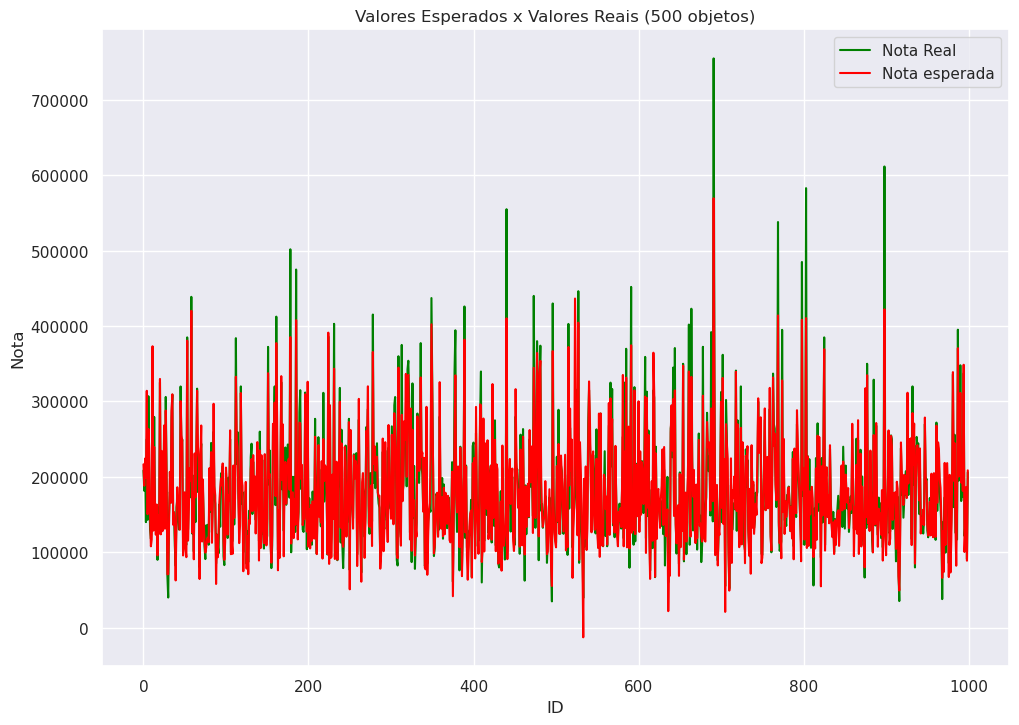

In [18]:
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(y.values[:1000],color='green',label='Nota Real')
plt.plot(infer[:1000],color='red',label='Nota esperada')

plt.legend()

plt.title(f"Valores Esperados x Valores Reais (500 objetos)")
plt.ylabel("Nota")
plt.xlabel("ID")

plt.show()


In [19]:
# Verificando multicolinearidade do primeiro dataset (X)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values(['VIF'],ascending=False)[vif_data['VIF'] > 5]

,feature,VIF
41,TotalBsmtSF,inf
44,1stFlrSF,inf
37,BsmtFinSF1,inf
39,BsmtFinSF2,inf
40,BsmtUnfSF,inf
47,GrLivArea,inf
46,LowQualFinSF,inf
45,2ndFlrSF,inf
28,YearBuilt,8.890106
61,GarageCars,6.174194


Um VIF acima de 5, geralmente representa a existêcia de multi-colinearidade, então o interessante seria remover estes atributos.

In [20]:
# Vamos verificar multi-colinearidade no dataset enxugado (P)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data2 = pd.DataFrame()
vif_data2["feature"] = P.columns
  
# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(P.values, i)
                          for i in range(len(P.columns))]
vif_data2.sort_values(['VIF'],ascending=False)[vif_data['VIF'] > 5]

,feature,VIF


Como podemos ver, durante o teste de hipóteses, estes atributos foram removidos.

Podemos comprar os modelos, ao remover os atributos com alta multi-colinearidade com o dataset enxugado.

In [22]:
# Características do modelo
modelo1 = sm.OLS(y, sm.add_constant(P))
        
#Calcula os valores p
modelo1 = modelo1.fit(use_t=False)

remover = list(vif_data2.sort_values(['VIF'],ascending=False)[vif_data['VIF'] > 5].feature)
X.drop(remover,axis=1,inplace=True)
# Características do modelo
modelo2 = sm.OLS(y, sm.add_constant(X))
        
#Calcula os valores p
modelo2 = modelo2.fit(use_t=False)

print(f"R2-Normal para P: {modelo1.rsquared}\n")
print(f"R2-Normal para X: {modelo2.rsquared}\n")

print(f"R2-Ajustado para P: {modelo1.rsquared_adj}\n")
print(f"R2-Ajustado para X: {modelo2.rsquared_adj}\n")


R2-Normal para P: 0.8600396404152278

R2-Normal para X: 0.8659356256882523

R2-Ajustado para P: 0.8573010729320877

R2-Ajustado para X: 0.8590778659071758



Mesmo o R2 ajustado sendo melhor para o dataset X, temos que remover estes atributos, visto que ele estão influenciando negativamente nosso modelo.

# Inferência final

In [23]:
modelo1.summary(alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     314.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:25:30   Log-Likelihood:                -17109.
No. Observations:                1460   AIC:                         3.428e+04
Df Residuals:                    1431   BIC:                         3.443e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.005      0.995]
---------------------------------------------------------------------------------
const          1.809e+05    785.393    230.358      0.000    1.79e+05    1.83e+05
SaleCondition  5495.3595    895.785      6.135      0.000    3187.971    7802.748
RoofMatl       5466.0960    809.259      6.754      0.000    3381.583    7550.609
RoofStyle      3062.7714    860.358      3.560      0.000     846.635    5278.908
Condition2    -2362.8006    802.919     -2.943      0.003   -4430.982    -294.620
Condition1     3007.5857    820.415      3.666      0.000     894.337    5120.834
Neighborhood    1.72e+04   1266.963     13.579      0.000    1.39e+04    2.05e+04
LotConfig      3037.9848    805.591      3.771      0.000     962.921    5113.049
LandContour    2742.5419    816.154      3.360      0.001     640.268    4844.815
MSSubClass    -8651.7345    882.506     -9.804      0.000   -1.09e+04   -6378.549
Utilities      2213.3409    800.873      2.764      0.006     150.428    4276.254
OverallQual     1.22e+04   1526.728      7.990      0.000    8266.369    1.61e+04
OverallCond    5399.6224    881.476      6.126      0.000    3129.089    7670.155
MasVnrArea     3056.3883    939.667      3.253      0.001     635.967    5476.810
ExterQual      4135.2244   1363.187      3.033      0.002     623.887    7646.562
BsmtQual       4721.8962   1510.838      3.125      0.002     830.235    8613.558
BsmtCond      -3385.2400   1153.449     -2.935      0.003   -6356.328    -414.152
BsmtExposure   6425.2163    943.527      6.810      0.000    3994.853    8855.580
BsmtFinType1   4265.4742   1066.223      4.001      0.000    1519.067    7011.882
1stFlrSF       2.035e+04   1494.969     13.613      0.000    1.65e+04    2.42e+04
2ndFlrSF       2.128e+04   1532.711     13.884      0.000    1.73e+04    2.52e+04
BsmtFullBath   3850.5819   1017.233      3.785      0.000    1230.362    6470.801
BedroomAbvGr  -3322.3808   1185.707     -2.802      0.005   -6376.561    -268.201
KitchenQual    5695.2228   1236.197      4.607      0.000    2510.990    8879.455
TotRmsAbvGrd   5060.8956   1639.626      3.087      0.002     837.500    9284.291
Functional     2495.2811    837.342      2.980      0.003     338.430    4652.132
Fireplaces     2951.5757    944.798      3.124      0.002     517.936    5385.215
GarageCars     4803.1788   1074.256      4.471      0.000    2036.078    7570.279
ScreenPorch    2746.6455    811.550      3.384      0.001     656.231    4837.060
==============================================================================
Omnibus:                      426.591   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46749.417
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                      30.720   Cond. No.                         7.15
================================================================

Como temos 28 coeficientes, temos que nos atentar. Entretanto, as que tem mais impacto no preço de casas da nossa população são:

1. SaleCondition
2. RoofMatl
3. OverallCond
4. BsmtExposure
5. 1stFlrSF
6. 2ndFlrSF
7. KitchenQual
8. TotRmsAbvGrd

Estes coeficientes são as que tem mais impacto no preço das casas, tendo um valor de mais de 5000, o que implica que uma variação de 1, tende a impactar em 5000 unidades no preço.



# Suposições do modelo

1. Normalidade dos resíduos
O resíduo é diferença entre o valor real e o valor estimado. Caso tenhámos um residuo negativo, isso significa que o valor estimado é bem mais alto. A ideia da regressão é minimizar a soma dos resíduos. A primeira suposição diz, que se plotamos os resíduos, eles devem se assemelhar a uma distribuição normal.

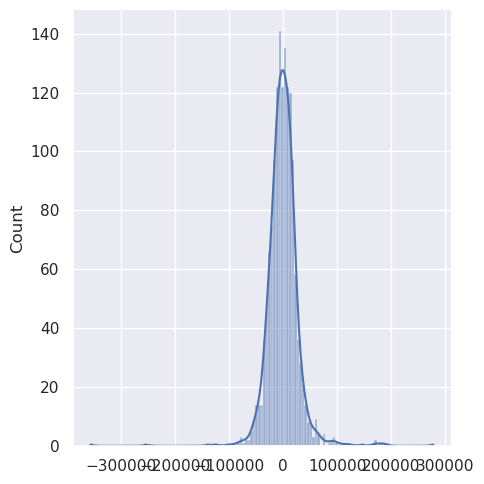

In [25]:
# Verificando a normalidade dos resíduos
residual = y - infer

sns.displot(residual,kde='True') # Arrumar o eixo X


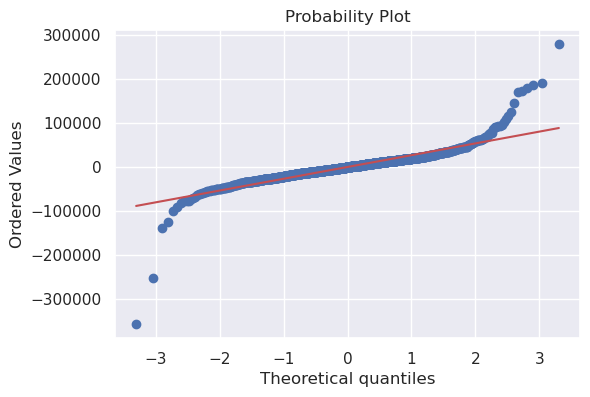

In [27]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.show()

Felizmente, os resíduos seguem a reta QQ, e desta maneira a primeira suposição é válida.

In [28]:
# Muito próximo a zero, bem interessante estar próximo de zero.
np.mean(residual)

-7.375628266432514e-11

2. Homocedasticidade
A variância dos resíduos precisa ser constante, ou seja, os resíduos devem ter uma distribuição constante ao longo do eixo X, caso contrário estariámos falando sobre Heterocedasticidade.

No eixo-X teremos os valores estimados de y, e no eixo-Y teremos os resíduos

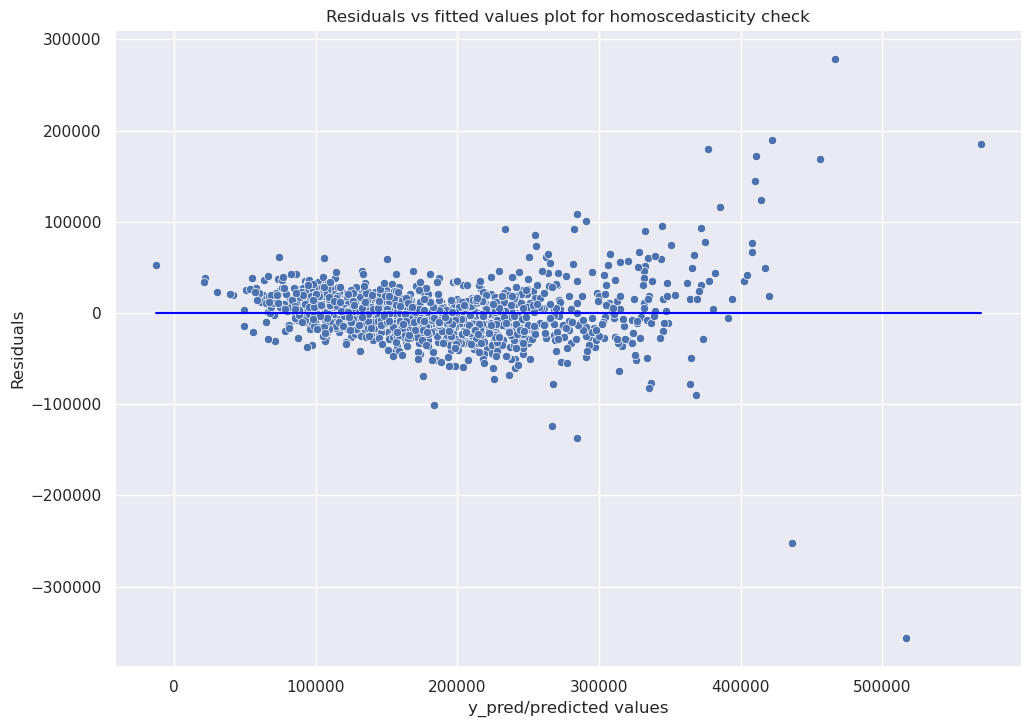

In [31]:
p = sns.scatterplot(x=infer,y=residual)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[infer.min(),infer.max()],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Podemos perceber que os valores estão bem distribuídos ao longo da reta, e não tem nenhum comportamento estranho.

3. Independência dos erros
Os erros não devem ter relação entre si, e desta maneira, quando plotamos eles, não devem ter relação nenhuma

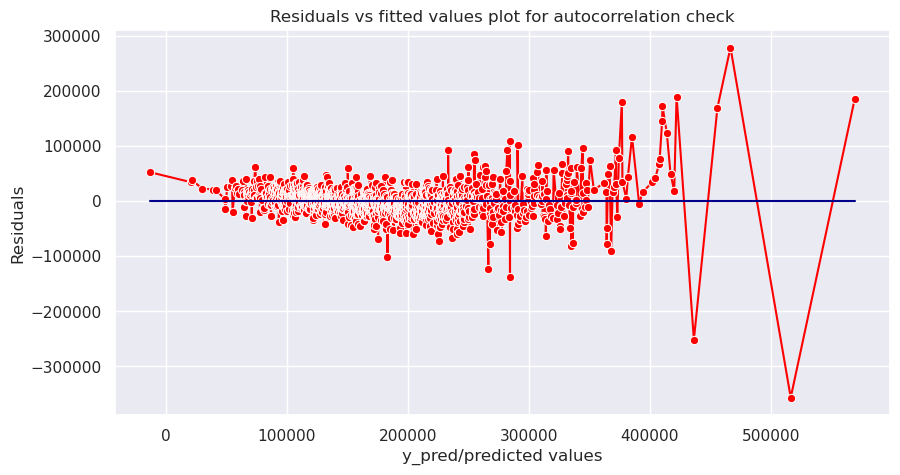

In [33]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=infer,y=residual,marker='o',color='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[infer.min(),infer.max()],y=[0,0],color='darkblue')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

# Conclusões

Podemos concluir que foi possível realizar uma boa inferência no nosso conjunto de dados, com resultados muito proveitosos, e conseguimos entender os principais atributos que conseguem explicar a variabilidade do preço de casas na nossa população, e também verificar propriedades do modelo, que podem ser utilizadas para validar ele.

Assim, concluimos que foi uma experiência muito proveitosa, que gerou muito conhecimento e muita utilização das técnicas na prática.